In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from cmapPy.pandasGEXpress.parse import parse

from scipy.stats import spearmanr as scor
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu as mwu

from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC
from sklearn.metrics import precision_recall_curve as PRC

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Importing data for comparison

In [37]:
#Importing CREEDs benchmark data files 
gene_perturb=pd.read_csv('../results/gene_pert.csv', sep=',', index_col=0, header=0)
drug_perturb=pd.read_csv('../results/drug_pert.csv', sep=',', index_col=0, header=0)

In [38]:
#Checking the absolut values of the benchmark data also
gene_perturb_A=gene_perturb.abs()
drug_perturb_A=drug_perturb.abs()
gene_perturb_A.to_csv('../results/gene_pert_A.csv', sep=',')
drug_perturb_A.to_csv('../results/drug_pert_A.csv', sep=',')

In [50]:
#Importing the NicheNet model
nn_model=pd.read_csv('../data/ligand_target_matrix.csv', sep=',', header=0, index_col=0)
nn_model = nn_model.reindex(sorted(nn_model.columns), axis=1)
ligand_receptor=pd.read_csv('../data/lr_network.csv', sep=',', header=0, index_col=0)

In [40]:
#Importing LINCS perturbation signatures 
consig_gse70138_trt_cp=pd.read_csv('../results/consensus_signature_gse70138_trt_cp.csv', header=0, sep=',', index_col=0)
consig_gse70138_trt_xpr=pd.read_csv('../results/consensus_signature_gse70138_trt_xpr.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_cp=pd.read_csv('../results/consensus_signature_gse92742_trt_cp.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_lig=pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_oe=pd.read_csv('../results/consensus_signature_gse92742_trt_oe.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_sh=pd.read_csv('../results/consensus_signature_gse92742_trt_sh.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_sh_fil=pd.read_csv('../results/consensus_signature_gse92742_trt_sh_fil.csv', header=0, sep=',', index_col=0)

In [41]:
#Checking the absolut values of LINCS also
consig_gse70138_trt_cp_A=consig_gse70138_trt_cp.abs()
consig_gse70138_trt_xpr_A=consig_gse70138_trt_xpr.abs()
consig_gse92742_trt_cp_A=consig_gse92742_trt_cp.abs()
consig_gse92742_trt_lig_A=consig_gse92742_trt_lig.abs()
consig_gse92742_trt_oe_A=consig_gse92742_trt_oe.abs()
consig_gse92742_trt_sh_A=consig_gse92742_trt_sh.abs()
consig_gse92742_trt_sh_fil_A=consig_gse92742_trt_sh_fil.abs()

In [42]:
consig_gse70138_trt_xpr=consig_gse70138_trt_xpr.T
consig_gse92742_trt_lig=consig_gse92742_trt_lig.T
consig_gse92742_trt_oe=consig_gse92742_trt_oe.T
consig_gse92742_trt_sh=consig_gse92742_trt_sh.T
consig_gse92742_trt_sh_fil=consig_gse92742_trt_sh_fil.T

consig_gse70138_trt_xpr_A=consig_gse70138_trt_xpr_A.T
consig_gse92742_trt_lig_A=consig_gse92742_trt_lig_A.T
consig_gse92742_trt_oe_A=consig_gse92742_trt_oe_A.T
consig_gse92742_trt_sh_A=consig_gse92742_trt_sh_A.T
consig_gse92742_trt_sh_fil_A=consig_gse92742_trt_sh_fil_A.T

# NicheNet vs. CREEDs

### NN vs. drug_perturb

In [49]:
drug_perturb.shape

(7781, 387)

In [50]:
nn_model.shape

(25345, 688)

In [51]:
common_genes=list(set(nn_model.index)& set(drug_perturb.index))

In [52]:
len(common_genes)

7727

In [53]:
nn_model=nn_model.loc[common_genes]
drug_perturb=drug_perturb.loc[common_genes]
drug_perturb_A=drug_perturb_A.loc[common_genes]

In [62]:
drug_perturb.shape

(7727, 387)

In [55]:
nn_model.shape

(7727, 688)

In [56]:
drug_perturb.head()

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
FAM3A,1.528467,-0.150743,0.222181,-0.470496,0.731880,-0.181326,3.436021,-1.500258,-1.500258,0.068688,...,-0.054181,-0.471603,1.638888,0.813216,1.220660,7.955420,2.458027,-1.388246,0.192524,0.089808
MPI,-0.349662,-2.366964,-0.065323,0.101187,-0.379393,0.432761,3.318031,1.594171,1.594171,-0.759975,...,1.402696,-0.200662,-1.609156,2.248813,0.453140,2.587244,2.098900,1.275870,-0.174179,-0.738923
MIER2,-1.125718,0.779621,-0.603046,-0.580376,0.836180,1.459272,1.060877,0.616406,0.616406,-0.509168,...,1.237060,-3.720114,-0.269386,-0.343174,0.976845,-0.602606,-1.084516,1.839062,-1.892136,0.419547
ARHGEF10,-0.178789,0.251414,-1.485443,0.183717,0.564224,1.062560,-1.319166,-0.834716,-0.834716,-0.852956,...,-1.157459,-1.534592,-1.136904,-1.125984,-0.257826,8.268007,1.298609,0.539243,-1.166287,0.863441
SPATA24,1.005510,-2.834021,3.133430,-1.404423,0.773887,-0.140430,-0.627203,1.616636,1.616636,-0.366637,...,2.014616,1.198471,-0.936847,-0.579943,-4.438929,-10.927265,-0.068208,-0.686556,-0.744657,0.740323


In [67]:
drug_NN=pd.DataFrame(index=nn_model.columns, columns=drug_perturb.columns)
drug_A_NN=pd.DataFrame(index=nn_model.columns, columns=drug_perturb_A.columns)

In [68]:
drug_NN.head()

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AANAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
for lig in drug_NN.index:
    for exp in drug_NN.columns:
        r=pearsonr(nn_model[lig],drug_perturb[exp])
        r=r[0]
        drug_NN.loc[lig,exp]=r

C:\Users\nidik\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [70]:
for lig in drug_A_NN.index:
    for exp in drug_A_NN.columns:
        r=pearsonr(nn_model[lig],drug_perturb_A[exp])
        r=r[0]
        drug_A_NN.loc[lig,exp]=r

In [72]:
drug_NN.to_csv('../results/drug_NN_sim.csv', sep=',')
drug_A_NN.to_csv('../results/drug_A_NN_sim.csv', sep=',')

### NN vs. gene_perturb

In [73]:
common_genes=list(set(nn_model.index)& set(gene_perturb.index))
len(common_genes)

6826

In [74]:
nn_model=nn_model.loc[common_genes]
gene_perturb=gene_perturb.loc[common_genes]
gene_perturb_A=gene_perturb_A.loc[common_genes]

In [75]:
gene_NN=pd.DataFrame(index=nn_model.columns, columns=gene_perturb.columns)
gene_A_NN=pd.DataFrame(index=nn_model.columns, columns=gene_perturb_A.columns)

In [76]:
gene_NN.head()

,2410,2860,2487,2723,1319,3062,169,358,2422,2338,...,1830,2025,2777,2993,1946,2389,378,2411,2982,2742
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AANAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
for lig in gene_NN.index:
    for exp in gene_NN.columns:
        r=pearsonr(nn_model[lig],gene_perturb[exp])
        r=r[0]
        gene_NN.loc[lig,exp]=r

C:\Users\nidik\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [78]:
for lig in gene_A_NN.index:
    for exp in gene_A_NN.columns:
        r=pearsonr(nn_model[lig],gene_perturb_A[exp])
        r=r[0]
        gene_A_NN.loc[lig,exp]=r

In [80]:
gene_NN.to_csv('../results/gene_NN_sim.csv', sep=',')
gene_A_NN.to_csv('../results/gene_A_NN_sim.csv', sep=',')

# LINCS vs. CREEDs

In [43]:
def lincs_creeds_sim(consig, creeds_name, fname):
    creeds=pd.read_csv('../results/'+creeds_name+'.csv',sep=',', index_col=0, header=0)
    common_genes=list(set(consig.index)& set(creeds.index))
    creeds=creeds.loc[common_genes]
    consig=consig.loc[common_genes]
    similarity_fname=pd.DataFrame(index=consig.columns, columns=creeds.columns)
    for lig in similarity_fname.index:
        for exp in similarity_fname.columns:
            r=pearsonr(consig[lig],creeds[exp])
            r=r[0]
            similarity_fname.loc[lig,exp]=r
    similarity_fname.to_csv('../results/'+creeds_name+'_'+fname+'.csv', sep=',')
    #return similarity_fname.head()

### LINCS vs. drug_perturb

In [45]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'drug_pert', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'drug_pert', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'drug_pert', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'drug_pert', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'drug_pert', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'drug_pert', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'drug_pert', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'drug_pert', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'drug_pert', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'drug_pert', 'gse70138_trt_sh_fil_A')

### LINCS vs. drug_perturb_A

In [46]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'drug_pert_A', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'drug_pert_A', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'drug_pert_A', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'drug_pert_A', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'drug_pert_A', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'drug_pert_A', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'drug_pert_A', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'drug_pert_A', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'drug_pert_A', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'drug_pert_A', 'gse70138_trt_sh_fil_A')

### LINCS vs. gene_perturb

In [47]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'gene_pert', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'gene_pert', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'gene_pert', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'gene_pert', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'gene_pert', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'gene_pert', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'gene_pert', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'gene_pert', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'gene_pert', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'gene_pert', 'gse70138_trt_sh_fil_A')

### LINCS vs. gene_perturb_A

In [48]:
lincs_creeds_sim(consig_gse70138_trt_xpr, 'gene_pert_A', 'gse70138_trt_xpr')
lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'gene_pert_A', 'gse70138_trt_xpr_A')
lincs_creeds_sim(consig_gse92742_trt_lig, 'gene_pert_A', 'gse70138_trt_lig')
lincs_creeds_sim(consig_gse92742_trt_lig_A, 'gene_pert_A', 'gse70138_trt_lig_A')
lincs_creeds_sim(consig_gse92742_trt_oe, 'gene_pert_A', 'gse70138_trt_oe')
lincs_creeds_sim(consig_gse92742_trt_oe_A, 'gene_pert_A', 'gse70138_trt_oe_A')
lincs_creeds_sim(consig_gse92742_trt_sh, 'gene_pert_A', 'gse70138_trt_sh')
lincs_creeds_sim(consig_gse92742_trt_sh_A, 'gene_pert_A', 'gse70138_trt_sh_A')
lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'gene_pert_A', 'gse70138_trt_sh_fil')
lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'gene_pert_A', 'gse70138_trt_sh_fil_A')

# Evaluating similarity with ROC curves

### Comparing NicheNet with CREEDs

In [62]:
similarity=pd.read_csv('../results/gene_NN_sim.csv',sep=',',header=0,index_col=0)

In [63]:
meta = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)

In [64]:
lr_network = pd.read_csv('../data/lr_network.csv', sep=',', header=0, index_col=0)

In [65]:
good_source = ['kegg_cytokines', 'kegg_cams', 'kegg_neuroactive', 'kegg_ecm', 'pharmacology', 'ramilowski_known']
lr_network = lr_network[np.in1d(lr_network['source'], good_source)]
lr_network.head()

,from,to,source,database
1,CXCL1,CXCR2,kegg_cytokines,kegg
2,CXCL2,CXCR2,kegg_cytokines,kegg
3,CXCL3,CXCR2,kegg_cytokines,kegg
4,CXCL5,CXCR2,kegg_cytokines,kegg
5,PPBP,CXCR2,kegg_cytokines,kegg


In [66]:
similarity.head()

,2410,2860,2487,2723,1319,3062,169,358,2422,2338,...,1830,2025,2777,2993,1946,2389,378,2411,2982,2742
A2M,-0.038699,-0.049446,0.081242,-0.003450,-0.025308,0.011098,0.000285,-0.030274,-0.082235,-0.060269,...,0.037064,-0.031674,0.003815,0.050718,0.016912,-0.037577,-0.068707,0.108302,-0.042271,-0.014820
AANAT,-0.038209,-0.079271,0.076323,-0.023940,0.032480,0.014345,0.011687,-0.011025,-0.100036,-0.025256,...,0.029474,-0.008134,-0.002666,0.049662,-0.030334,-0.025429,-0.035234,0.082722,-0.040324,0.009324
ADAM12,-0.036660,-0.033528,0.069146,-0.008778,-0.039136,0.008922,-0.014692,-0.027231,-0.073598,-0.057468,...,0.041015,-0.021111,0.005802,0.061673,0.014733,-0.042970,-0.077354,0.105102,-0.035882,-0.023975
ADAM15,-0.046566,-0.063452,0.073299,-0.048081,0.040736,-0.007671,0.019924,-0.006517,-0.096430,0.004263,...,0.015353,-0.019922,-0.002388,0.044010,-0.047967,-0.045091,0.010051,0.077977,-0.016666,0.021123
ADAM17,-0.020800,-0.044450,0.066712,0.029450,-0.028732,0.039558,0.001212,-0.035122,-0.076297,-0.068012,...,0.050480,-0.051200,0.004015,0.043707,0.027426,-0.038948,-0.091170,0.103425,-0.071417,0.003589


In [68]:
meta.head()

,cell_type,chdir_norm,ctrl_ids,curator,geo_id,hs_gene_symbol,mm_gene_symbol,organism,pert_ids,pert_type,platform,version,sign
1928,brown adipose tissue of ob/ob mice,NaN,GSM800590|GSM800591|GSM800592|GSM800593|GSM800...,Andrew,GSE32316,FGFR1,Fgfr1,mouse,GSM800596|GSM800597|GSM800598|GSM800599|GSM800...,drugactivation,GPL1261,1.0,0
2347,heart,NaN,GSM360098|GSM360099|GSM360100,nbongio,GSE14411,ITGB1,Itgb1,mouse,GSM360101|GSM360102|GSM360103,KO,GPL6246,1.0,-1
2584,Osteoclasts,NaN,GSM1487524|GSM1487525|GSM1487526,maroulisv,GSE60761,CALCR,Calcr,mouse,GSM1487530|GSM1487531|GSM1487532,KO,GPL1261,1.0,-1
2589,glioma cells,NaN,GSM1498939|GSM1498940|GSM1498941,NaN,GSE61178,KDR,Kdr,human,GSM1498942|GSM1498943|GSM1498944,KD,GPL10558,1.0,-1
1852,mammary gland,NaN,GSM72723|GSM72730|GSM72795|GSM72877,Andrew,GSE3260,FGFR1,Fgfr1,mouse,GSM72726|GSM72727|GSM72789|GSM72793|GSM72869,activemutant,GPL81,1.0,1


In [69]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'hs_gene_symbol']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [72]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [73]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.546014849206806

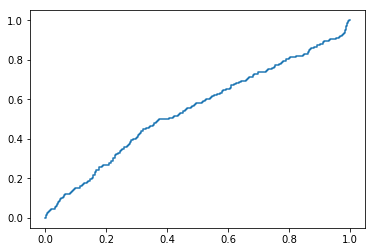

In [74]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)

In [90]:
for l_or_r in similarity.columns:
        pairs=[l_or_r]
        pairs+=list(ligand_receptor[ligand_receptor['to']==l_or_r]['from'])
        pairs=list(set(pairs)&set(truedata.index))
        truedata.loc[pairs,l_or_r]=1

In [ ]:
truedata=np.zeros((correlations.shape),int) #array
truedata=pd.DataFrame(truedata, index=correlations.index, columns=correlations.columns)

In [ ]:
def NN_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity+'.csv',sep=',',header=0,index_col=0)
    truedata=np.zeros((similarity.shape),int) #array
    truedata=pd.DataFrame(truedata, index=similarity.index, columns=similarity.columns)
    for l_or_r in similarity.columns:
        pairs=[l_or_r]
        pairs+=list(ligand_receptor[ligand_receptor['to']==l_or_r]['from'])
        pairs=list(set(pairs)&set(truedata.index))
        truedata.loc[pairs,l_or_r]=1
    
    truedata_ROC=truedata.values.reshape((1,-1))[0]
    #ROC
    y_pr=similarity
    y_true=truedata
    fpr, tpr, th=ROC(y_true=y_true, y_score=y_pr)
    plt.subplot(121)
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    #PRC
    y_pred=similarity
    y_tr=truedata
    precision, recall, thresholds = PRC( y_true=y_tr, probas_pred=y_pred)
    plt.subplot(122)
    plt.plot(recall, precision)
    plt.xlabel('Recall', size=15)
    plt.ylabel('Precision', size=15)
    plt.title(similarity_name, size=12)
    random_AUC=np.sum(y_tr)/len(y_tr)
    real_AUC=AUC(recall, precision)
    plt.plot([0,1],[random_AUC,random_AUC], 'k:') #matplotlib colours, line stile
    print (AUC(recall,precision))
    print('Random AUC:',np.sum(y_tr)/len(y_tr))
    plt.legend(['PRC AUC=' + str(real_AUC)[:4], 'random AUC='+ str(random_AUC)[:4]])
    plt.tight_layout()

In [ ]:
NN_compare('drug_NN_sim')

In [ ]:
NN_compare('drug_A_NN_sim')

In [ ]:
NN_compare('gene_NN_sim')

In [ ]:
NN_compare('gene_A_NN_sim')

### Comparing LINCS with CREEDs

In [ ]:
def LINCS_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity+'.csv',sep=',',header=0,index_col=0)
    
    #ROC
    y_pr=similarity
    y_true=pd.Series(0,index=y_pr.index)
    y_true[list(set(rl[pathway])&(set(progeny_consig.index)))]=1
    
    fpr, tpr, th=ROC(y_true=y_true, y_score=y_pr)
    plt.subplot(121)
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    #PRC
    y_pred=similarity
    y_tr=truedata
    precision, recall, thresholds = PRC( y_true=y_tr, probas_pred=y_pred)
    plt.subplot(122)
    plt.plot(recall, precision)
    plt.xlabel('Recall', size=15)
    plt.ylabel('Precision', size=15)
    plt.title(similarity_name, size=12)
    random_AUC=np.sum(y_tr)/len(y_tr)
    real_AUC=AUC(recall, precision)
    plt.plot([0,1],[random_AUC,random_AUC], 'k:') #matplotlib colours, line stile
    print (AUC(recall,precision))
    print('Random AUC:',np.sum(y_tr)/len(y_tr))
    plt.legend(['PRC AUC=' + str(real_AUC)[:4], 'random AUC='+ str(random_AUC)[:4]])
    plt.tight_layout()

In [ ]:
lincs_compare('drug_pert_gse70138_trt_xpr')
lincs_compare('drug_pert_gse70138_trt_xpr_A')
lincs_compare('drug_pert_gse70138_trt_lig')
lincs_compare('drug_pert_gse70138_trt_lig_A')
lincs_compare('drug_pert_gse70138_trt_oe')
lincs_compare('drug_pert_gse70138_trt_oe_A')
lincs_compare('drug_pert_gse70138_trt_sh')
lincs_compare('drug_pert_gse70138_trt_sh_A')
lincs_compare('drug_pert_gse70138_trt_sh_fil')
lincs_compare('drug_pert_gse70138_trt_sh_fil_A')

In [ ]:
lincs_compare('drug_pert_A_gse70138_trt_xpr')
lincs_compare('drug_pert_A_gse70138_trt_xpr_A')
lincs_compare('drug_pert_A_gse70138_trt_lig')
lincs_compare('drug_pert_A_gse70138_trt_lig_A')
lincs_compare('drug_pert_A_gse70138_trt_oe')
lincs_compare('drug_pert_A_gse70138_trt_oe_A')
lincs_compare('drug_pert_A_gse70138_trt_sh')
lincs_compare('drug_pert_A_gse70138_trt_sh_A')
lincs_compare('drug_pert_A_gse70138_trt_sh_fil')
lincs_compare('drug_pert_A_gse70138_trt_sh_fil_A')

In [ ]:
lincs_compare('gene_pert_gse70138_trt_xpr')
lincs_compare('gene_pert_gse70138_trt_xpr_A')
lincs_compare('gene_pert_gse70138_trt_lig')
lincs_compare('gene_pert_gse70138_trt_lig_A')
lincs_compare('gene_pert_gse70138_trt_oe')
lincs_compare('gene_pert_gse70138_trt_oe_A')
lincs_compare('gene_pert_gse70138_trt_sh')
lincs_compare('gene_pert_gse70138_trt_sh_A')
lincs_compare('gene_pert_gse70138_trt_sh_fil')
lincs_compare('gene_pert_gse70138_trt_sh_fil_A')

In [ ]:
lincs_compare('gene_pert_A_gse70138_trt_xpr')
lincs_compare('gene_pert_A_gse70138_trt_xpr_A')
lincs_compare('gene_pert_A_gse70138_trt_lig')
lincs_compare('gene_pert_A_gse70138_trt_lig_A')
lincs_compare('gene_pert_A_gse70138_trt_oe')
lincs_compare('gene_pert_A_gse70138_trt_oe_A')
lincs_compare('gene_pert_A_gse70138_trt_sh')
lincs_compare('gene_pert_A_gse70138_trt_sh_A')
lincs_compare('gene_pert_A_gse70138_trt_sh_fil')
lincs_compare('gene_pert_A_gse70138_trt_sh_fil_A')